Restrict the time window for both the real and the synthetic regions such that no other protests regarding the topic occur (except the protest under investigation).

In [1]:
%load_ext autoreload
%autoreload complete

In [2]:
from src.data.protests.sources.acled import load_acled

acled = load_acled()
from src.data.news.sources.mediacloud import newspapers_by_region

acled = acled[acled["admin1"].isin(newspapers_by_region.keys())]
climate_actors = ["FFF: Fridays for Future; Students (Germany)"]
acled = acled[acled["assoc_actor_1"].isin(climate_actors)]
acled = acled[
    (acled["event_date"] >= "2020-07-01") & (acled["event_date"] < "2022-07-01")
]

In [3]:
acled = acled.sample(100)

In [4]:
from src.models.synthetic_region import evaluate_multiple_protests

metrics, dfs, agg_df = evaluate_multiple_protests(
    "klimaschutz", acled, source="mediacloud"
)
agg_df.head()

100%|██████████| 87/87 [00:05<00:00, 16.18it/s]

,date,real,synth_mean,synth_lasso,synth_linear_regression,synth_boosting,synth_random_forest
0,-168,0.473688,0.562322,0.445484,0.419207,0.625544,0.612024
1,-167,0.383445,0.154279,0.257052,0.251842,0.471684,0.444035
2,-166,0.517081,0.265860,0.264529,0.263294,0.497301,0.491736
3,-165,0.865277,2.189722,0.879580,0.833518,0.845347,0.803004
4,-164,0.812266,0.600339,0.654728,0.641061,0.804457,0.714060


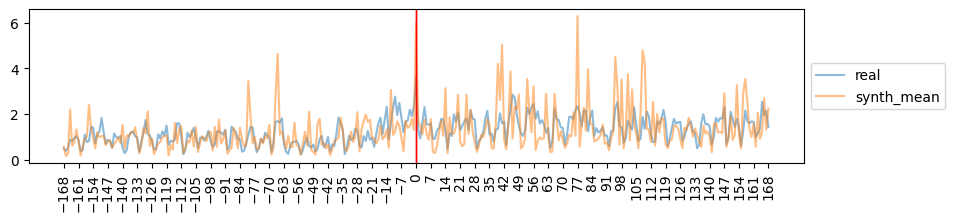

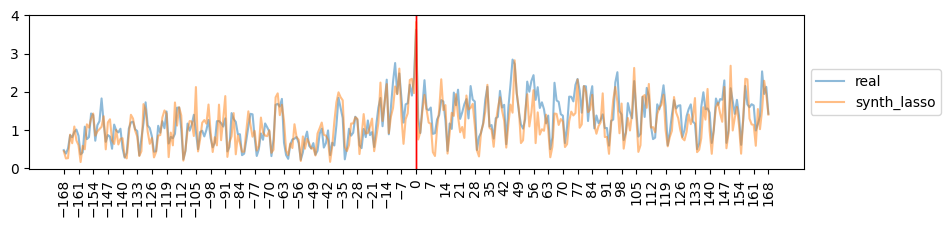

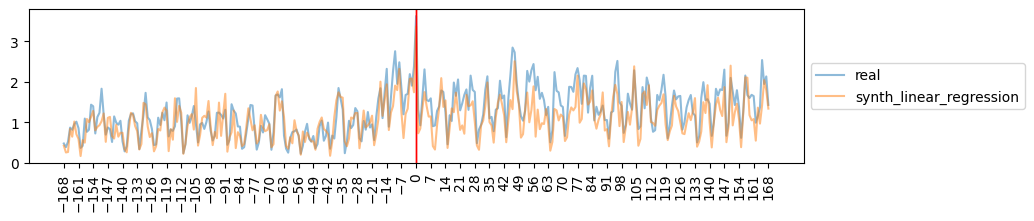

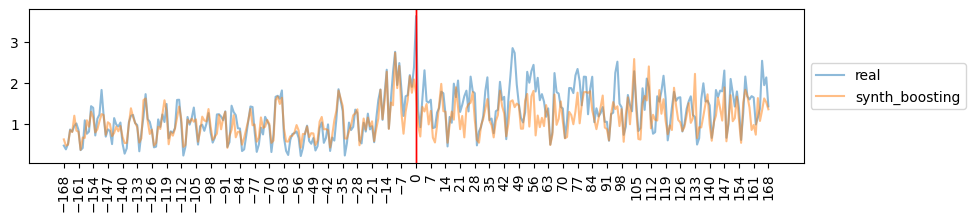

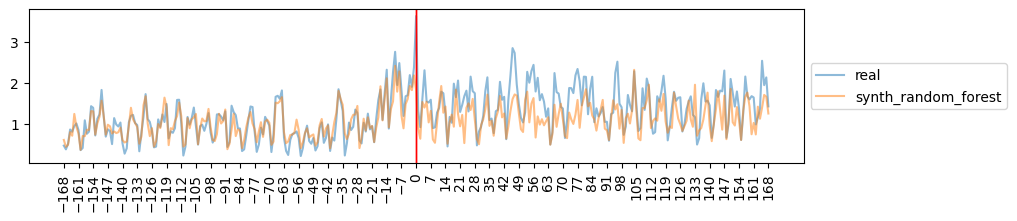

In [5]:
import matplotlib.pyplot as plt

from src.data.discourse.visual import plot_coverage_sequence

for group in [
    "synth_mean",
    "synth_lasso",
    "synth_linear_regression",
    "synth_boosting",
    "synth_random_forest",
]:
    fig, ax = plt.subplots(figsize=(10, 2))
    plot_coverage_sequence(
        agg_df.rename(columns={"real": "count"}), ax=ax, label="real"
    )
    plot_coverage_sequence(agg_df.rename(columns={group: "count"}), ax=ax, label=group)
    plt.show()

In [6]:
len(dfs), len(metrics)

(28, 28)

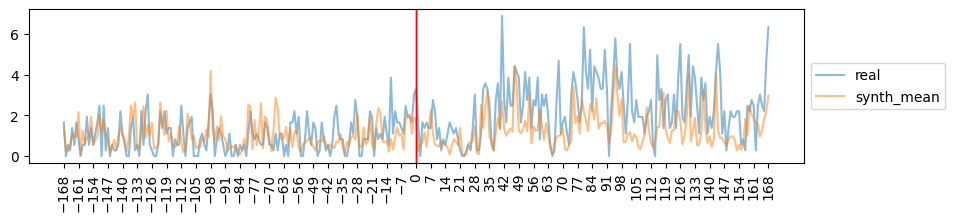

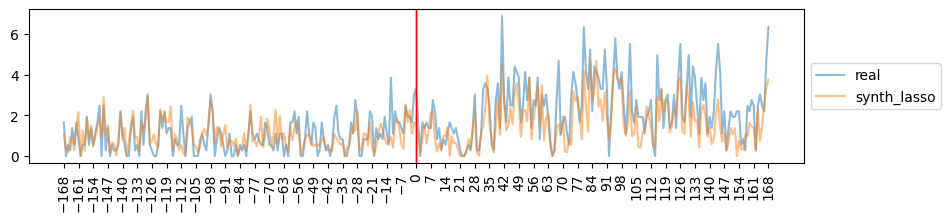

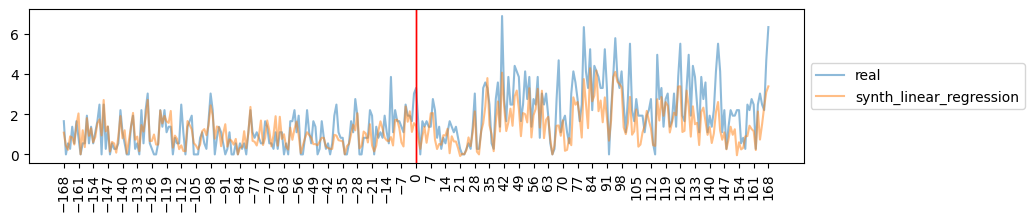

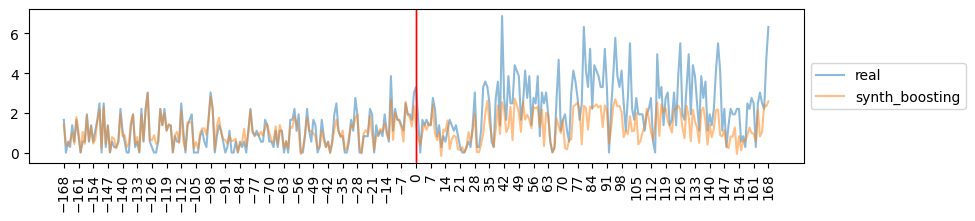

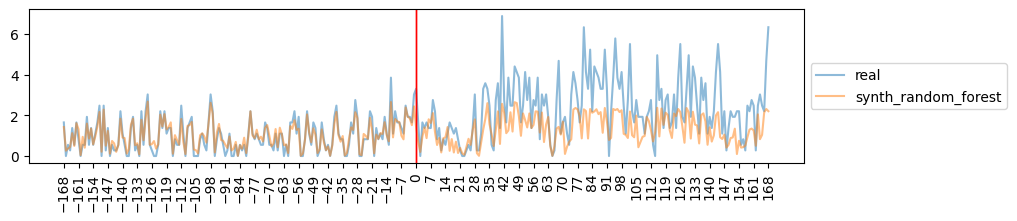

----------


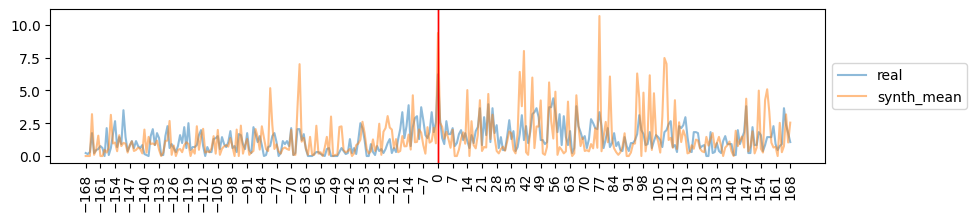

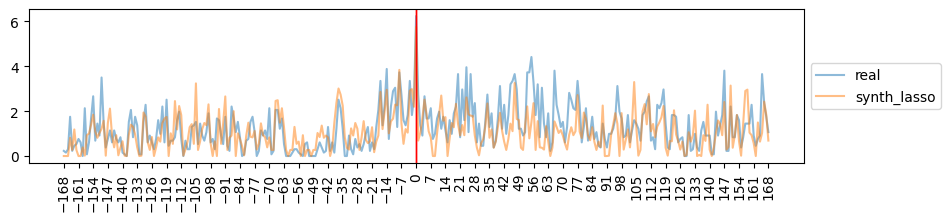

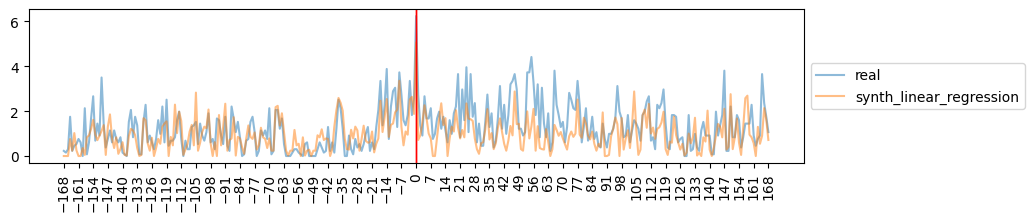

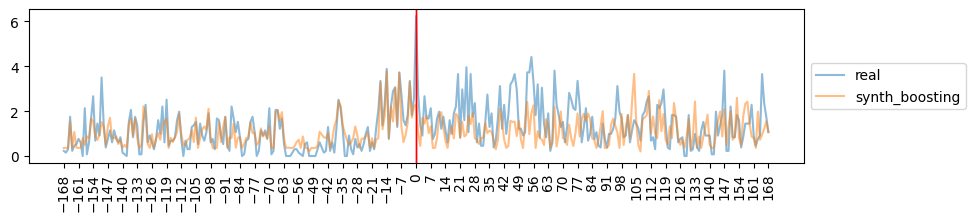

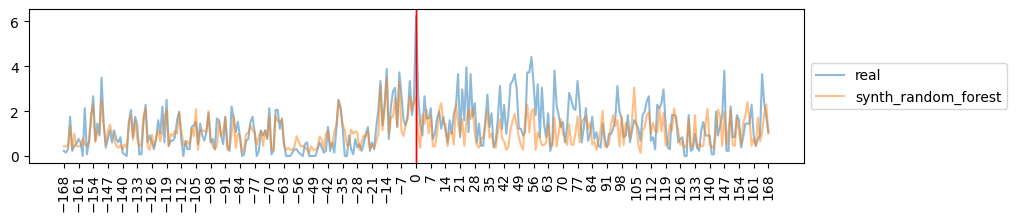

----------


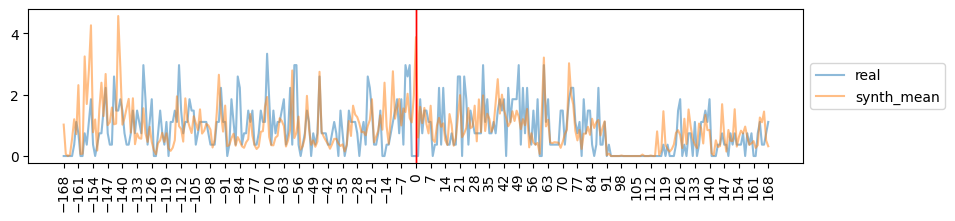

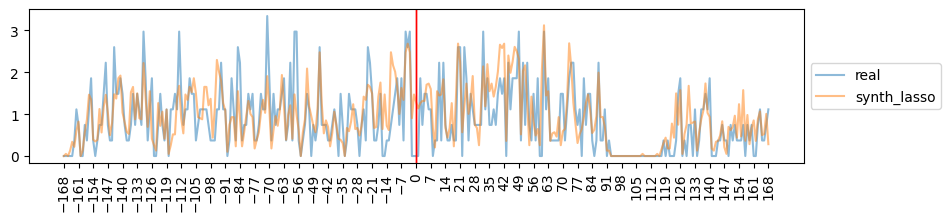

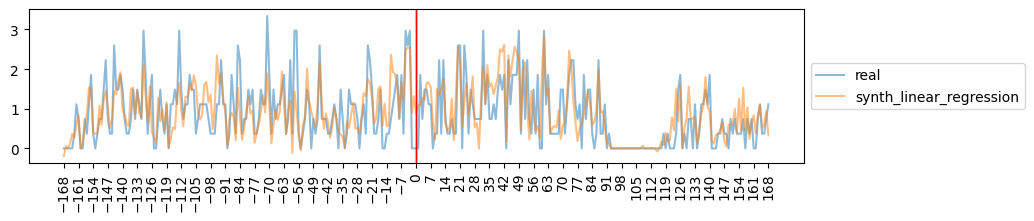

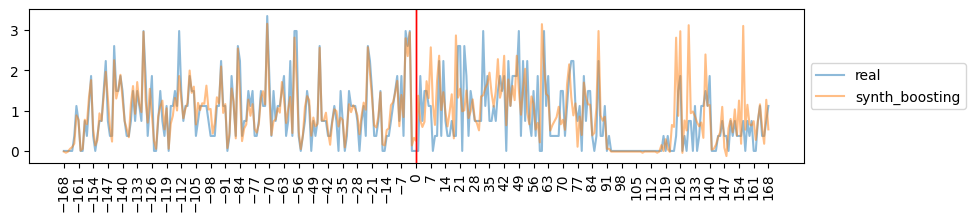

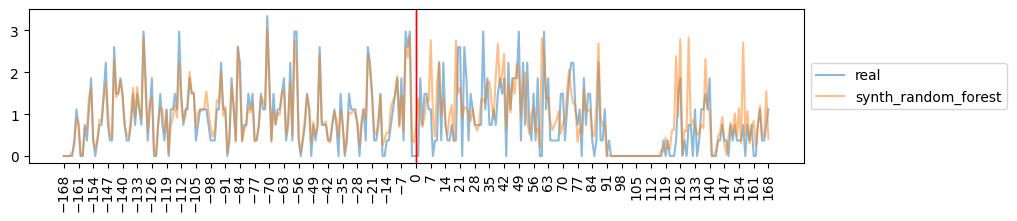

----------


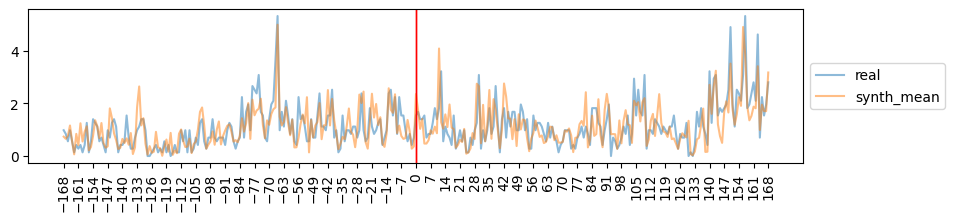

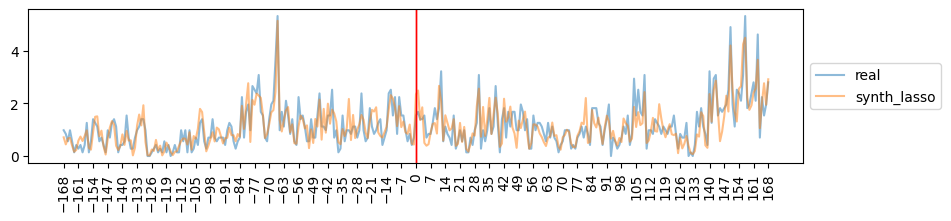

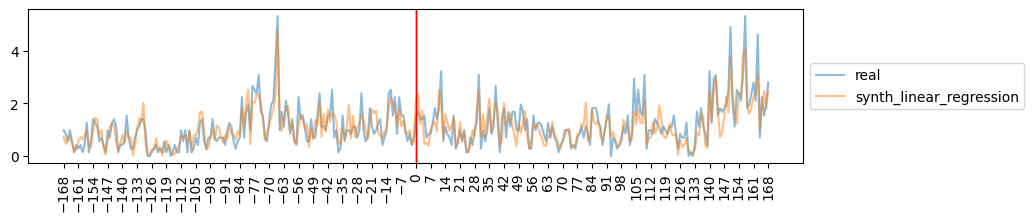

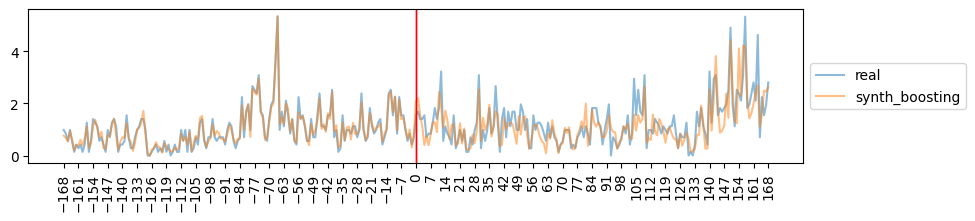

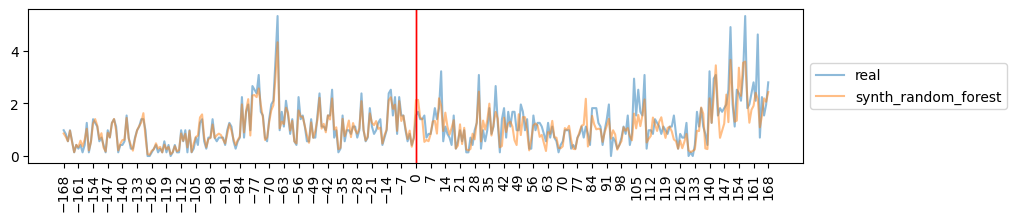

----------


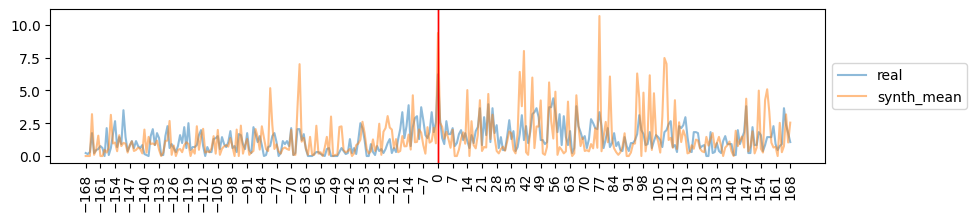

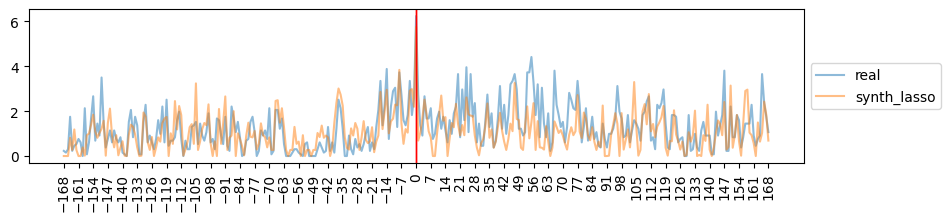

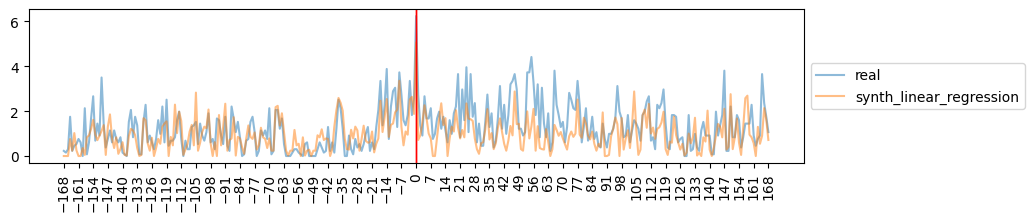

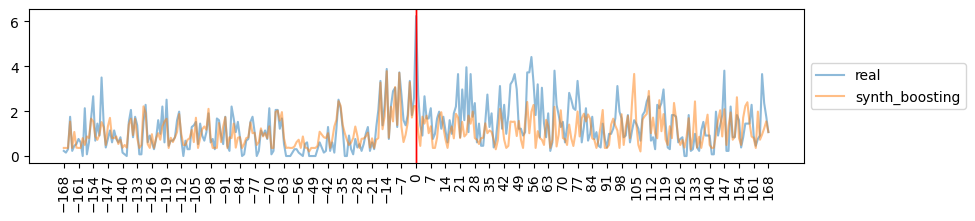

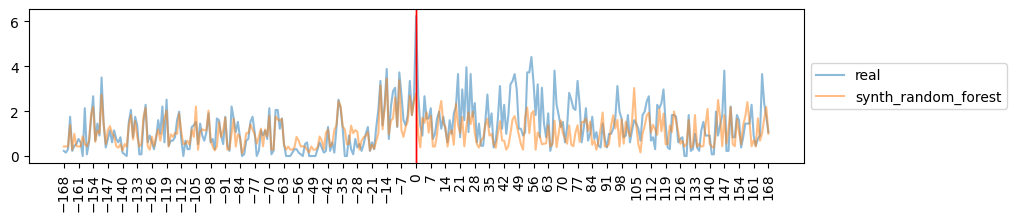

----------


In [7]:
for df in dfs[:5]:
    for method in [
        "synth_mean",
        "synth_lasso",
        "synth_linear_regression",
        "synth_boosting",
        "synth_random_forest",
    ]:
        fig, ax = plt.subplots(figsize=(10, 2))
        plot_coverage_sequence(
            df.rename(columns={"real": "count"}), ax=ax, label="real"
        )
        plot_coverage_sequence(
            df.rename(columns={method: "count"}), ax=ax, label=method
        )
        df["diff"] = df["real"] - df[method]
        # plot_coverage_sequence(
        #     df.rename(columns={"diff": "count"}), ax=ax, label=f"diff ({method})"
        # )
        plt.show()
    print("----------")

In [8]:
from src.data.protests.random import get_random_events

random_events = get_random_events(100)

In [13]:
from src.models.synthetic_region import evaluate_multiple_protests

metrics, dfs, agg_df = evaluate_multiple_protests(
    "klimaschutz", random_events[13:], source="mediacloud"
)
agg_df.head()

  0%|          | 0/71 [2:22:26<?, ?it/s]


IndexError: index 0 is out of bounds for axis 0 with size 0